In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
dataset = pd.read_csv(dataset_path)

x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

y_train = x_train.pop('Outcome')
y_test = x_test.pop('Outcome')

In [0]:
x_train.head()

In [0]:
y_train.value_counts() # Binary classification

0    347
1    191
Name: Outcome, dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu', input_shape=[x_train.shape[1]])) # first hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    validation_data = (x_test, y_test),
                    callbacks = [earlystopping])

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6698 - accuracy: 0.6171 - val_loss: 0.6643 - val_accuracy: 0.6652
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6279 - accuracy: 0.6506 - val_loss: 0.6353 - val_accuracy: 0.6565
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.6877 - val_loss: 0.6107 - val_accuracy: 0.6696
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5491 - accuracy: 0.7249 - val_loss: 0.6055 - val_accuracy: 0.6696
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5194 - accuracy: 0.7454 - val_loss: 0.6383 - val_accuracy: 0.6957
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5037 - accuracy: 0.7342 - val_loss: 0.5566 - val_accuracy: 0.7261
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7788 - val_loss: 0.6036 - val_accuracy: 0.6870
Epoch 8/100
1

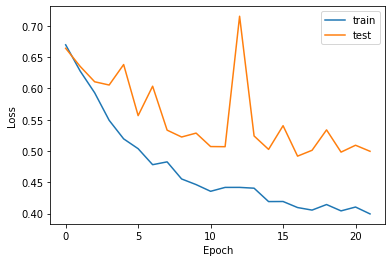

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7478


[0.49953165650367737, 0.747826099395752]

In [0]:
probs = model.predict(x_test)

In [0]:
probs[:10]

array([[0.02016744],
       [0.9121201 ],
       [0.27885473],
       [0.13126534],
       [0.47067162],
       [0.31511098],
       [0.21492887],
       [0.02483016],
       [0.02487123],
       [0.731071  ]], dtype=float32)

In [0]:
probs.round().flatten().astype(int)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0])